In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [6]:
len(df.select_dtypes(include='object').columns)

3

In [7]:
df.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
len(df.select_dtypes(include=['int64','float64']).columns)

11

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.isnull().values.sum()

0

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = pd.get_dummies(data=df,drop_first=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [20]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


<Axes: >

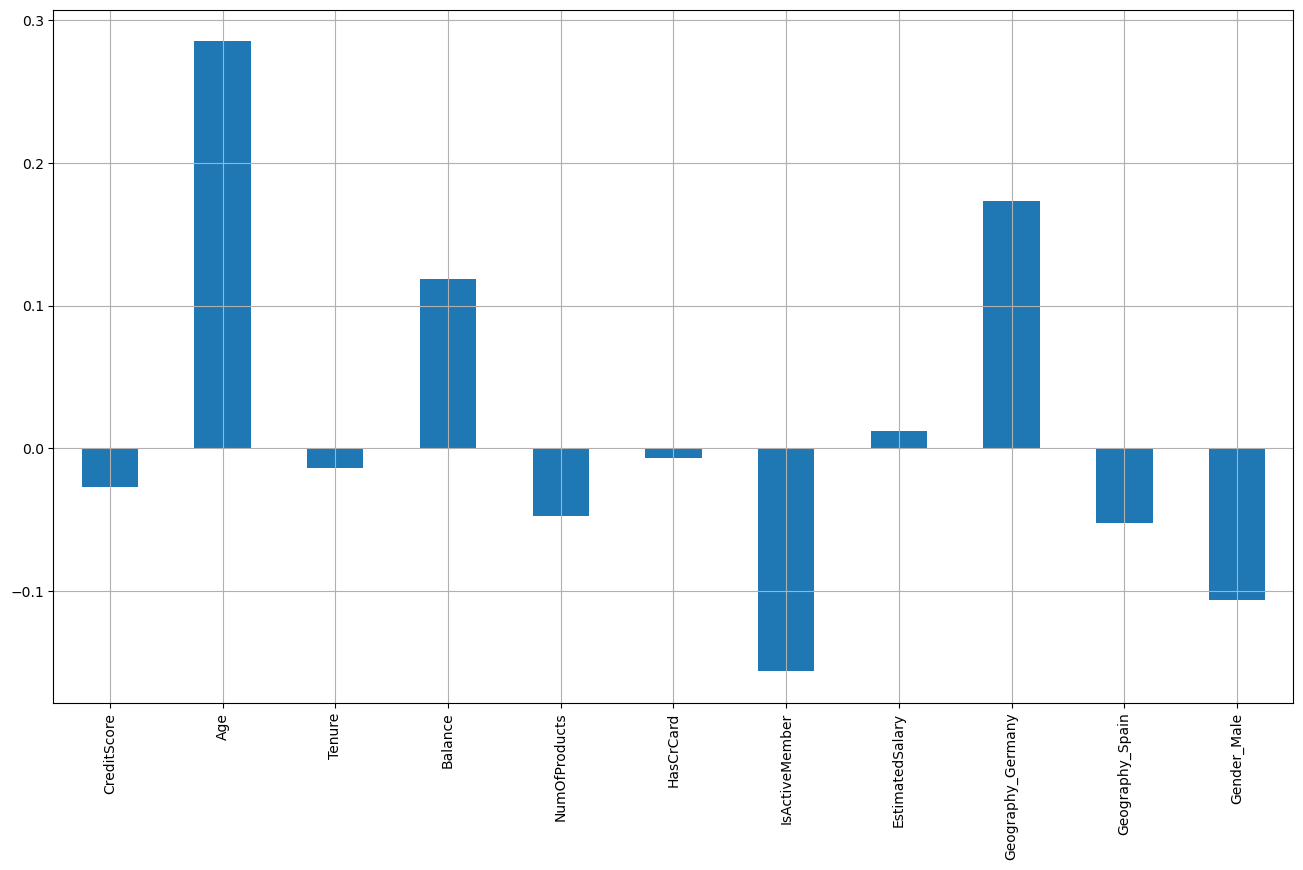

In [23]:
df1 = df.drop(columns='Exited')
df1.corrwith(df['Exited']).plot.bar(
    figsize=(16,9),grid=True,)

<Axes: >

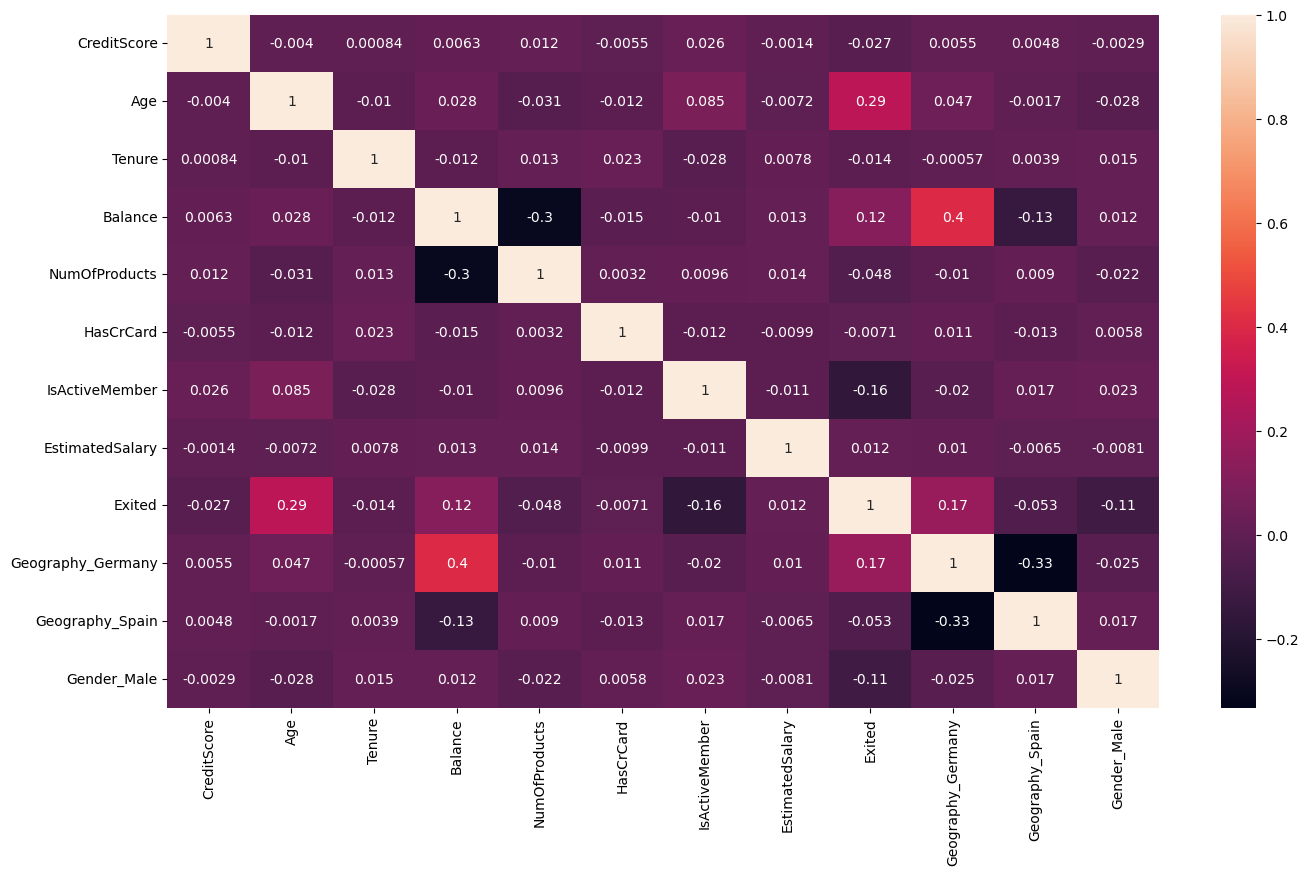

In [24]:
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
x= df.drop(columns='Exited')

In [27]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [28]:
y= df['Exited']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [32]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
x_train = sc.fit_transform(x_train
                        )
x_test = sc.fit_transform(x_test)

In [36]:
x_test 

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [37]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_LR = LogisticRegression(random_state=0)
model_LR.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [41]:
y_pred = model_LR.predict(x_test)

In [42]:
from sklearn.metrics import f1_score,r2_score,precision_score,accuracy_score,recall_score,confusion_matrix

In [43]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [44]:
result_LR = pd.DataFrame([['LogisticRegression',acc,f1,pre,rec]],
                        columns=['Model','Accuracy','F1','precision','Recall'])

In [45]:
result_LR 

,Model,Accuracy,F1,precision,Recall
0,LogisticRegression,0.813,0.315018,0.609929,0.212346


In [46]:
cm = confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[1540,   55],
       [ 319,   86]], dtype=int64)

# Random Forect

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [51]:
y_pred = model_RF.predict(x_test)

In [52]:
from sklearn.metrics import f1_score,r2_score,precision_score,accuracy_score,recall_score,confusion_matrix

In [53]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [54]:
result_RF = pd.DataFrame([['RandomForestClassifier',acc,f1,pre,rec]],
                        columns=['Model','Accuracy','F1','precision','Recall'])

In [55]:
result_RF

,Model,Accuracy,F1,precision,Recall
0,RandomForestClassifier,0.8655,0.611833,0.736111,0.523457


In [56]:
results = pd.concat([result_LR,result_RF], ignore_index=True)
results

,Model,Accuracy,F1,precision,Recall
0,LogisticRegression,0.8130,0.315018,0.609929,0.212346
1,RandomForestClassifier,0.8655,0.611833,0.736111,0.523457


In [57]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1519,   76],
       [ 193,  212]], dtype=int64)

XGBClassifier


In [69]:
#pip install xgboost

In [60]:
from xgboost import XGBClassifier


In [61]:
model_XG = XGBClassifier(random_state=0)
model_XG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [62]:
y_pred = model_XG.predict(x_test)

In [63]:
from sklearn.metrics import f1_score,r2_score,precision_score,accuracy_score,recall_score,confusion_matrix

In [64]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [65]:
result_XG = pd.DataFrame([['XGBClassifier',acc,f1,pre,rec]],
                        columns=['Model','Accuracy','F1','precision','Recall'])

In [66]:
result_XG

,Model,Accuracy,F1,precision,Recall
0,XGBClassifier,0.794,0.426184,0.488818,0.377778


In [67]:
results = pd.concat([result_LR,result_RF,result_XG], ignore_index=True)
results

,Model,Accuracy,F1,precision,Recall
0,LogisticRegression,0.8130,0.315018,0.609929,0.212346
1,RandomForestClassifier,0.8655,0.611833,0.736111,0.523457
2,XGBClassifier,0.7940,0.426184,0.488818,0.377778
